In [35]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [36]:
df=pd.read_csv('cases_train_preprocessed.csv')

/Users/timothywaikinlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df.head()

,age,sex,latitude,longitude,date_confirmation,additional_information,outcome,age_range_ind,age_range,land,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,47.0,Not Available,59.7294,13.2354,1.590822e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,1241.0,73.0,0.0,1168.0,439.425808,5.882353
1,47.0,Not Available,35.2923,-2.9381,1.586934e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,664.0,4.0,125.0,535.0,784.045153,0.602410
2,47.0,Not Available,55.9903,13.5958,1.587625e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,5366.0,276.0,0.0,5090.0,389.453828,5.143496
3,47.0,Not Available,59.6025,18.1384,1.586848e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,23739.0,2400.0,0.0,21339.0,998.661804,10.109946
4,47.0,Not Available,59.6714,16.2159,1.588057e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,2854.0,183.0,0.0,2671.0,1034.639018,6.412053


In [ ]:
'''
train = pd.read_csv(r'../results/cases_train_preprocessed.csv',dtype=object)
test =  pd.read_csv(r'../results/cases_test_preprocessed.csv',dtype=object)
df_tr, df_te = train_test_split(train, test_size=0.2, random_state = 1)

## Split Data

In [37]:
def convertText(x):
    if x == '[]':
        return 0
    else:
        return 1
    
#df['source'] = df['source'].apply(convertText)
df['additional_information'] = df['additional_information'].apply(convertText)

In [4]:
df['additional_information']

0         0
1         0
2         0
3         0
4         0
         ..
366595    0
366596    0
366597    0
366598    0
366599    1
Name: additional_information, Length: 366600, dtype: int64

In [38]:
df=df.drop(columns=['province', 'country','source'])

In [40]:
for col in df.dtypes[df.dtypes == "object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
df.head()

,age,latitude,longitude,date_confirmation,additional_information,land,Confirmed,Deaths,Recovered,Active,...,outcome_recovered,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior,Last_Update_2020-09-20 04:22:56,Last_Update_9/20/2020 4:22:56 AM
0,47.0,59.7294,13.2354,1.590822e+09,0,True,1241.0,73.0,0.0,1168.0,...,0,0,1,0,1,0,0,0,1,0
1,47.0,35.2923,-2.9381,1.586934e+09,0,True,664.0,4.0,125.0,535.0,...,0,0,1,0,1,0,0,0,1,0
2,47.0,55.9903,13.5958,1.587625e+09,0,True,5366.0,276.0,0.0,5090.0,...,0,0,1,0,1,0,0,0,1,0
3,47.0,59.6025,18.1384,1.586848e+09,0,True,23739.0,2400.0,0.0,21339.0,...,0,0,1,0,1,0,0,0,1,0
4,47.0,59.6714,16.2159,1.588057e+09,0,True,2854.0,183.0,0.0,2671.0,...,0,0,1,0,1,0,0,0,1,0


In [41]:
labels = df.pop("outcome_deceased")
print(labels)

0         0
1         0
2         0
3         0
4         0
         ..
366595    0
366596    0
366597    0
366598    0
366599    0
Name: outcome_deceased, Length: 366600, dtype: uint8


In [ ]:
#Get Target data 
#y = data['target']

#Load X Variables into a Pandas Dataframe with columns 
#X = data.drop(['target'], axis = 1)

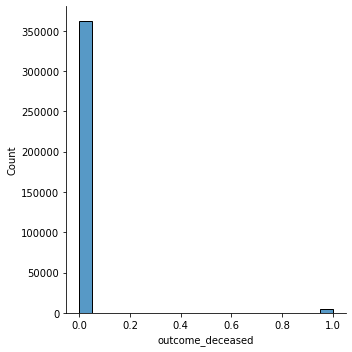

In [61]:
import seaborn as sns
sns.displot(labels,kde=False)


In [71]:
print(f'label_Y : {labels.shape}')
print(f'df_X : {df.shape}')

label_Y : (366600,)
df_X : (366600, 27)


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.20)

In [131]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [90]:
y_pred = rf.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [46]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9967880085653105

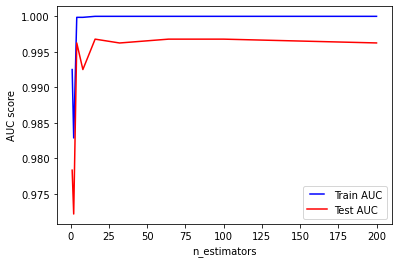

In [47]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [48]:
def get_recall_on_deseased(y_true, y_pred):
    ret = precision_recall_fscore_support(y_true, y_pred, average = None, labels=['deceased', 'hospitalized', 'nonhospitalized', 'recovered'])
    return ret[1][0]

def get_overall_recall(y_true, y_pred):
#     ret = precision_recall_fscore_support(y_true, y_pred, average = None, labels=['deceased', 'hospitalized', 'nonhospitalized', 'recovered'])
#     return ret[1].mean()
    ret = recall_score(y_true, y_pred, average='macro')
    return ret

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [77]:
from sklearn.model_selection import GridSearchCV
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed: 30.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [98]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [110]:
rf_Grid.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=17)

In [115]:
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score

best_dt = rf_Grid.best_estimator_
print('mean cv score: ', rf_Grid.best_score_)
print('accuracy: ', accuracy_score(y_test, best_dt.predict(x_test)))
print('overall recall: ', recall_score(y_test, best_dt.predict(x_test), average='macro'))

mean cv score:  0.9877114020731041
accuracy:  0.9883115111838516
overall recall:  0.5017441860465116


In [80]:
pd.DataFrame(rf_Grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.886171,0.024466,0.329864,0.001562,True,2,auto,1,2,10,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.987613,0.987602,0.987602,0.987606,0.000005,159
1,2.489047,0.665270,0.403713,0.038079,True,2,auto,1,2,17,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.987613,0.987602,0.987602,0.987606,0.000005,159
2,2.478926,0.039003,0.422010,0.008997,True,2,auto,1,2,25,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.987613,0.987602,0.987602,0.987606,0.000005,159
3,3.363554,0.126360,0.572383,0.108537,True,2,auto,1,2,33,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.987613,0.987602,0.987602,0.987606,0.000005,159
4,3.901793,0.150127,0.524426,0.004816,True,2,auto,1,2,41,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.987613,0.987602,0.987602,0.987606,0.000005,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,10.055280,0.063117,0.823560,0.033735,False,4,sqrt,2,5,48,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.987613,0.987674,0.987674,0.987653,0.000029,78
316,10.019647,0.197997,0.915161,0.090372,False,4,sqrt,2,5,56,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.987613,0.987633,0.987602,0.987616,0.000013,153
317,12.749710,1.308741,0.992679,0.106439,False,4,sqrt,2,5,64,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.987674,0.987633,0.987674,0.987660,0.000019,53
318,15.646717,0.162576,1.128037,0.112793,False,4,sqrt,2,5,72,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.987613,0.987674,0.987674,0.987653,0.000029,78


In [ ]:
dt_grid_search.best_estimator_


In [83]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.988


In [132]:
import pickle
filename = 'RandomForestModel0'
pickle.dump(rf, open(filename,'wb'))



In [116]:
filename1 = 'RandomForestModel_tuning'
pickle.dump(rf_Grid, open(filename1,'wb'))

In [134]:
model = pickle.load(open(filename,'rb'))

In [117]:
model2 = pickle.load(open(filename1,'rb'))

In [135]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [120]:
model2.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

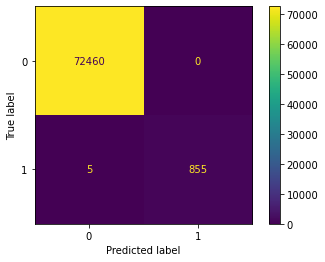

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()

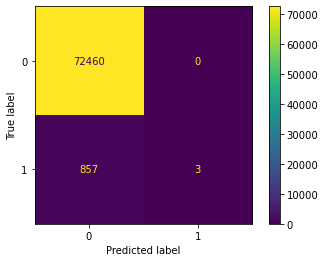

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model2.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()

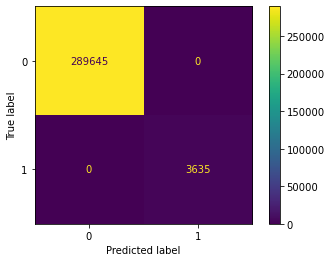

In [97]:
y_train_pred = model.predict(x_train)
train_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_matrix).plot()

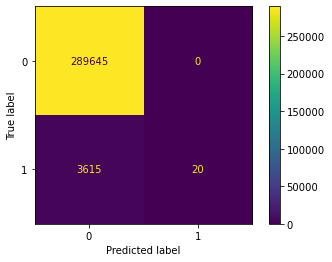

In [121]:
y_train_pred = model2.predict(x_train)
train_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_matrix).plot()

In [128]:
model.score(x_train,y_train)

0.9876738952536824

In [124]:
model2.score(x_train,y_train)

0.9876738952536824

In [106]:
model.score(x_test,y_test)

0.9999454446262956

[]

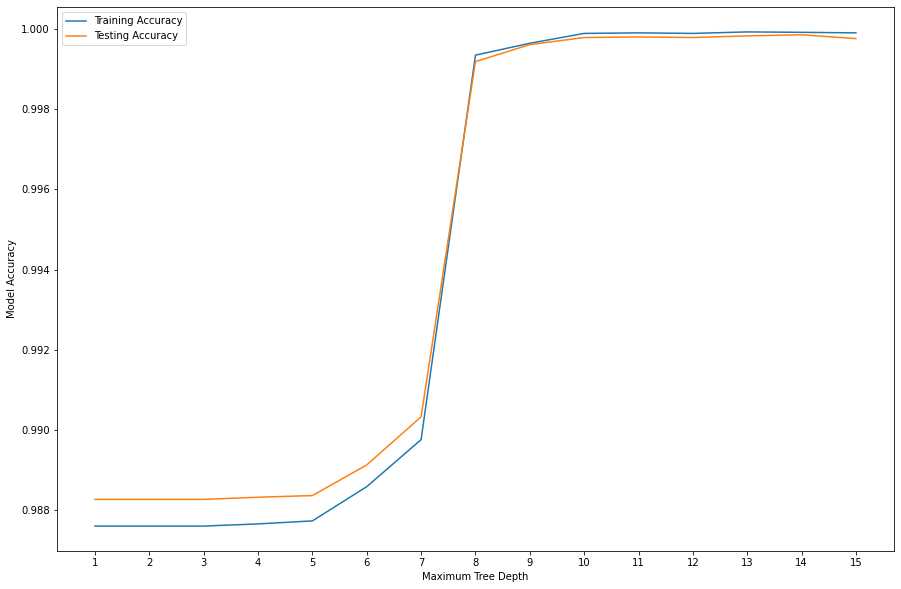

In [108]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for d in max_depth_list:
    rfc = RandomForestClassifier(n_estimators=100, max_depth=int(d), min_samples_leaf=10) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(rfc.score(x_train, y_train))
    test_accuracy.append(rfc.score(x_test, y_test))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, test_accuracy, label='Testing Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Model Accuracy')
plt.legend()
plt.plot()
